- seperate signal with 1250-point window(10s, 125Hz)
- make numpy array with shape of (-1,1250,4)


https://www.kaggle.com/code/stephenmugisha/bloodpressure-analysis

In [1]:
# importing libraries
import numpy as np # For numerical computation
import pandas as pd # Data manipulation
import seaborn as sns # plotting
import scipy.io # reading matlab files in python
from scipy import signal #signal processing
from scipy.fftpack import fft, dct #signal processing
from tqdm import tqdm
from sklearn.linear_model import LinearRegression #linear regression model
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold, train_test_split # cross validation split
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')

from matplotlib import pyplot as plt # For plotting graphs(Visualization)

import os # system-wide functions
# os.listdir('/kaggle/input/BloodPressureDataset')

(array([    0,   130,   260,   391,   521,   652,   782,   913,  1043,
         1173,  1304,  1434,  1565,  1695,  1826,  1956,  2086,  2217,
         2347,  2478,  2608,  2739,  2869,  3000,  3130,  3260,  3391,
         3521,  3652,  3782,  3913,  4043,  4173,  4304,  4434,  4565,
         4695,  4826,  4956,  5086,  5217,  5347,  5478,  5608,  5739,
         5869,  6000,  6130,  6260,  6391,  6521,  6652,  6782,  6913,
         7043,  7173,  7304,  7434,  7565,  7695,  7826,  7956,  8086,
         8217,  8347,  8478,  8608,  8739,  8869,  9000,  9130,  9260,
         9391,  9521,  9652,  9782,  9913, 10043, 10173, 10304, 10434,
        10565, 10695, 10826, 10956, 11086, 11217, 11347, 11478, 11608,
        11739, 11869]),
 (92,))

In [2]:
# # select data #1 (92 samples, first 75 are for training)
# # select data #2 (20 samples, first 16 are for training)

# np.random.seed(0)
# test1 = np.random
# test2 = np.arange(0,12000,12000/20).astype(int)

3000
(12, 1000)
[False False False False False False False False False False False False
  True False False False False False  True False False  True False  True
 False  True False False False False False False False False False  True
 False False  True False False  True  True False False  True  True  True
 False False False False  True False False  True  True  True False False
 False False False False False  True False False False  True  True False
  True False False False False False False False False False False False
 False False False False False  True  True False False  True False False
  True False False False]


In [20]:
sample_size = 38000 # 125 * 60* 5
signal_windowed = []
signal_windowed_train = []
signal_windowed_test = []
for i in range(12):
    data = scipy.io.loadmat(f'../data/raw/BloodPressureDataset/part_{i+1}.mat')['p']
    for j in tqdm(range(1000)):
        # windowing
        number = str(i*1000+j)
        target = data[0][j][:2,:]
        temp_length = target.shape[1]
        if temp_length < sample_size:
            continue
        np.savetxt(f'../data/raw/csv_cgan/{number}.csv',target[:,:sample_size].T,delimiter=',',fmt='%.7f')
        # for k in range((int)(temp_length/sample_size)):
        #     temp_signal = target[:, k*sample_size:(k+1)*sample_size]
        #     signal_windowed.append(temp_signal)
        #     if is_test[i,j]:
        #         # to test array
        #         signal_windowed_train.append(temp_signal)
        #     else:
        #         # to train array
        #         signal_windowed_test.append(temp_signal)
    # if i == 5 or i == 11:
    #     idx = (i+1)//6
    #     signal_windowed = np.array(signal_windowed)
    #     print(signal_windowed.shape)
    #     np.save(f"../data/raw/signal_windowed_{idx}.npy",signal_windowed)
    #     signal_windowed = []
# print(len(signal_windowed_train))
# print(len(signal_windowed_test))
# np.save(f"../data/raw/signal_windowed_test.npy",np.array(signal_windowed_test))
# del signal_windowed_test
# np.save(f"../data/raw/signal_windowed_train.npy",np.array(signal_windowed_train))

100%|██████████| 1000/1000 [00:10<00:00, 95.66it/s]


In [18]:

data[0][981][:2,:].shape

(2, 65000)

In [8]:
sample_file = scipy.io.loadmat(f'../data/raw/BloodPressureDataset/part_{1}.mat')
print(f'sample_file Data type: {type(sample_file)}')
print(f'sample_file keys:\n{sample_file.keys()}')

sample_file Data type: <class 'dict'>
sample_file keys:
dict_keys(['__header__', '__version__', '__globals__', 'p'])


In [9]:
# Loading a sample .mat file to understand the data dimensions
test_sample = sample_file['p']
print(f'test_sample Data type: {type(test_sample)}')
print(f'test_sample shape/dimensions: {test_sample.shape}')

test_sample Data type: <class 'numpy.ndarray'>
test_sample shape/dimensions: (1, 1000)


data: {'__header__':[],  '__version__':[], '__globals__':[], 'p':[]}  
data['p'] : array(1, 1000)  
data['p'][0] : array(1000,)  
data['p'][0][0]: array(3, x) x/125 = seconds  (ppg, bp, ecg)  

In [12]:
test_sample[0][0].shape

(3, 61000)

In [10]:
print(f"Total Samples: {len(test_sample[0])}")
print(f"Number of readings in each sample(column): {len(test_sample[0][0])}")
print(f"Number of samples in each reading(ECG): {len(test_sample[0][0][2])}")

temp_mat = test_sample[0, 999]
temp_length = temp_mat.shape[1]
sample_size = 125


print(temp_length)
print((int)(temp_length/sample_size))

Total Samples: 1000
Number of readings in each sample(column): 3
Number of samples in each reading(ECG): 61000
9000
72


In [9]:
print(test_sample[0].shape)
print(test_sample[0][0].shape)
print(test_sample[0][0][0][0])
print(type(test_sample[0][0][0][0]))
# for i in range(1000):
    # print(test_sample[0][i].shape[1])

(1000,)
(3, 61000)
1.7595307917888563
<class 'numpy.float64'>


In [11]:
sample_size = 125
ppg = []
for i in range(1000):
    temp_mat = test_sample[0, i]
    temp_length = temp_mat.shape[1]
    for j in range((int)(temp_length/sample_size)):
        temp_ppg = temp_mat[0, j*sample_size:(j+1)*sample_size]
        ppg.append(temp_ppg)

In [12]:
ecg = []
bp = []
sbp = [] #Systolic Blood Pressure
dbp = [] #Diastolic Blood Pressue
size = 125 #sample size

for i in range(1000):
    temp_mat = test_sample[0, i]
    temp_length = temp_mat.shape[1]
    for j in range((int)(temp_length/sample_size)):
        temp_ecg = temp_mat[2, j*size:(j+1)*size]
        temp_bp = temp_mat[1, j*size:(j+1)*size]
        
        max_value = max(temp_bp)
        min_value = min(temp_bp)
        
        sbp.append(max_value)
        dbp.append(min_value)
        ecg.append(temp_ecg)
        bp.append(temp_bp)

In [13]:
ppg, ecg, bp = np.array(ppg).reshape(-1,1), np.array(ecg).reshape(-1,1), np.array(bp).reshape(-1,1)
sbp, dbp = np.array(sbp).reshape(-1,1), np.array(dbp).reshape(-1,1)
print(f'PPG_shape: {ppg.shape}\n ECG_shape: {ecg.shape}\n BP_shape: {bp.shape}')
print(f'Systolic-BP_shape: {sbp.shape},\n Diastolic-BP_shape: {dbp.shape}')

PPG_shape: (32061000, 1)
 ECG_shape: (32061000, 1)
 BP_shape: (32061000, 1)
Systolic-BP_shape: (256488, 1),
 Diastolic-BP_shape: (256488, 1)


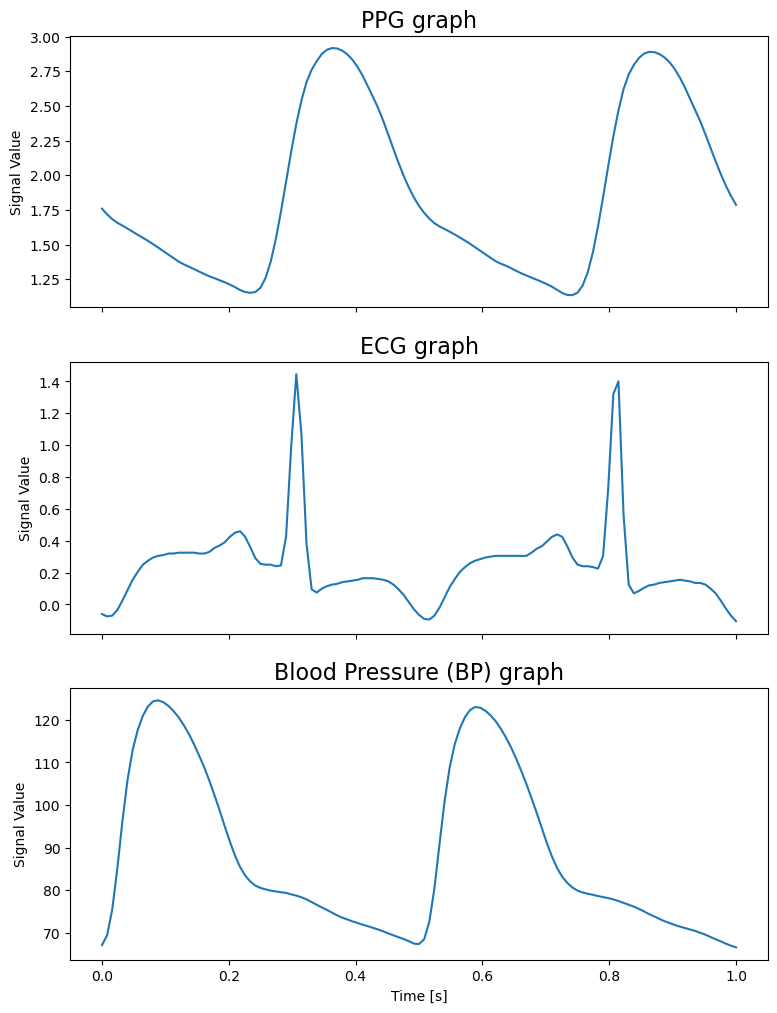

In [15]:
fig, ax = plt.subplots(3,1, figsize=(9,12), sharex=True)
x = np.linspace(0,1,125)
ax[0].set_title('PPG graph', fontsize=16)
ax[0].set_ylabel('Signal Value')
ax[0].plot(x,ppg[:125])

ax[1].set_title('ECG graph', fontsize=16)
ax[1].set_ylabel('Signal Value')
ax[1].plot(x,ecg[:125])

ax[2].set_title('Blood Pressure (BP) graph', fontsize=16)
ax[2].set_ylabel('Signal Value')
ax[2].set_xlabel('Time [s]')
ax[2].plot(x,bp[:125])


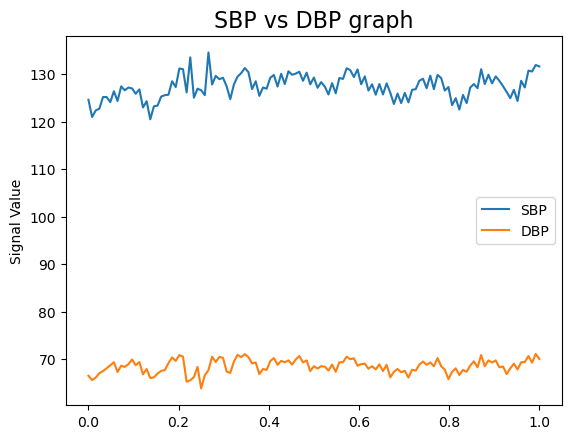

In [18]:
## Visualizing SBP and DBP
# fig, ax = plt.subplots(1,1, figsize=(12,9))
plt.figure()
plt.title('SBP vs DBP graph', fontsize=16)
plt.ylabel('Signal Value')
plt.plot(x,sbp[:125])
plt.plot(x,dbp[:125])
plt.legend(['SBP', 'DBP'])

In [19]:
32061000/1250

25648.8